# Library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil dataset

In [2]:
df = pd.read_csv('Used_Bikes.csv')

## BUSSINESS UNDERSTANDING

Pada tahapan ini kita membutuhkan pengetahuan dari objek bisnis, bagaimana membangun atau mendapatkan data,
dan bagaimana untuk mencocokan tujuan pemodelan untuk tujuan bisnis sehingga model terbaik dapat dibangun.
Banyaknya penduduk menyebabkan banyaknya pengguna sepeda motor di India.
Namun, karena sulitnya ekonomi membuat masyarakat di India lebih memilih membeli motor bekas dikarenakan harga nya lebih terjangkau.
Dari dataset berikut ini berisi sekitar 32649 motor bekas yang ada di India yang diambil dari www.droom.in')
Tujuan dari analisis ini untuk mengetahui estimasi harga motor bekas yang ada di India.')
https://www.kaggle.com/datasets/saisaathvik/used-bikes-prices-in-india')

# DATA UNDERSTANDING

Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data.
Dari data yang telah diambil mengenai harga motor bekas di India, terdapat 8 kolom yang berisi 4 kolom objek dan 4 kolom float.
Jika menggunakan regresi linear, maka hanya kolom yang berisi float saja yang bisa diolah.
1. bike_name (nama motor) = objek
2. price (harga) = float
3. city (nama kota) = objek
4. kms_driven (jumlah km yang telah ditempuh) = float
5. owner (pemilik, apakah pemilik motor tersebut merupakan pemilik pertama, kedua, atau ketiga) = objek
6. age (umur motor) = float
7. power (tenaga motor/cc) = float
8. brand (nama pabrikan motor) = objek

# Deskripsi dataset

In [3]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha


# DATA PREPARATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bike_name   32648 non-null  object
 1   price       32648 non-null  int64 
 2   city        32648 non-null  object
 3   kms_driven  32648 non-null  int64 
 4   owner       32648 non-null  object
 5   age         32648 non-null  int64 
 6   power       32648 non-null  int64 
 7   brand       32648 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


<Axes: >

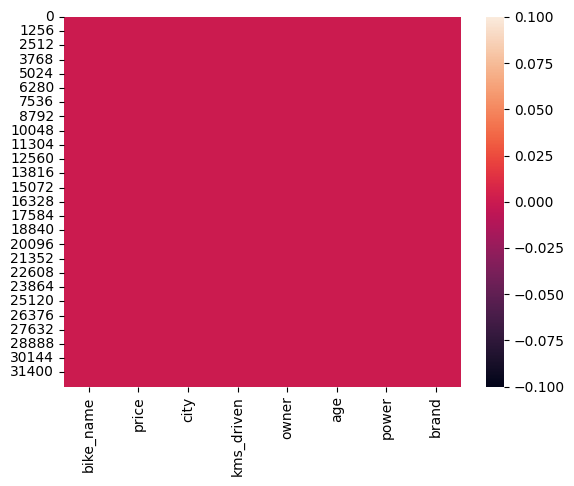

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


# visualisasi data

C:\Users\ACER\AppData\Local\Temp\ipykernel_1208\74495684.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

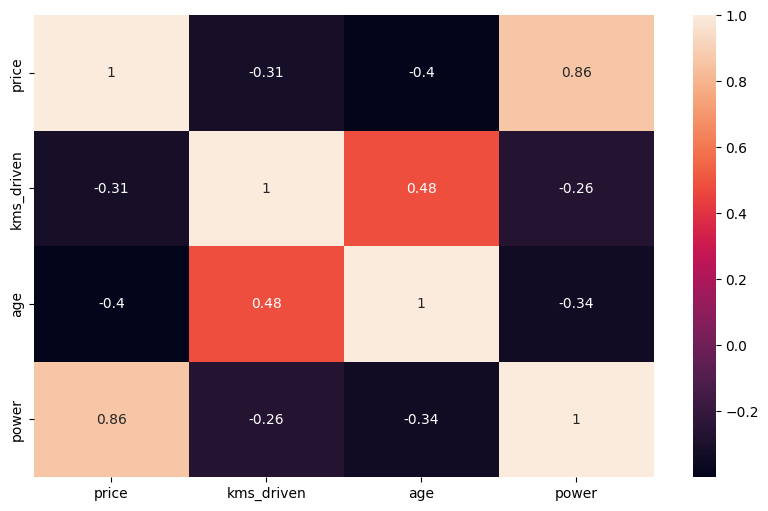

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

# Jumlah power berdasarkan nama motor

In [8]:
brands = df.groupby('bike_name').count()[['kms_driven']].sort_values(by='kms_driven', ascending=True).reset_index()
brands = brands.rename(columns={'kms_driven':'power'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

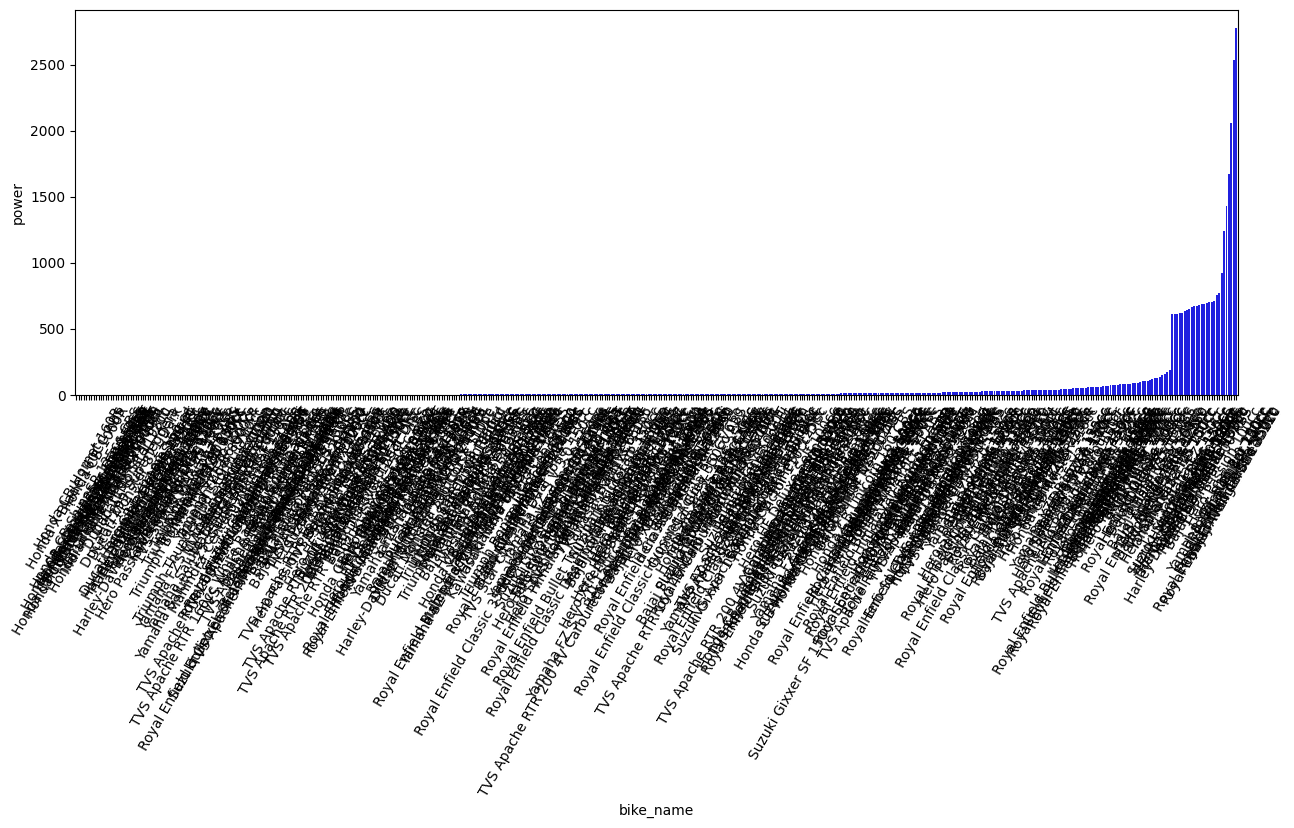

In [9]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=brands['bike_name'], y=brands['power'], color='blue')
plt.xticks(rotation=60)

# MODELLING DATA

# Seleksi fitur

In [10]:
fitur = ['kms_driven', 'age', 'power']
x = df[fitur]
y = df['price']
x.shape, y.shape

((32648, 3), (32648,))

# split data training dan testing

In [11]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(8162,)

# membuat regresi linier

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predik = lr.predict(X_test)

# EVALUATION DATA

In [13]:
nilai = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier : ', nilai)

Akurasi Model Regresi Linier :  0.7659800567831423


# membuat inputan regresi linier

Evaluation

In [14]:
#kms_driven = 16329.0, age = 4.0, power = 180.0
inputan = np.array([[16329.0,4.0,180.0]])
prediksi = lr.predict(inputan)
print('Estimasi Harga Motor : ', prediksi)

Estimasi Harga Motor :  [60829.44587764]


c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

# Save model

In [15]:
import pickle
filename = 'estimasi_bikes.sav'
pickle.dump(lr,open(filename,'wb'))